# Speed running entire project

In [41]:
import pandas as pd
import numpy as np
import mmh3

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import networkx as nx
import math as math
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

from tqdm import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# Get reviews
Movies = pd.read_csv('data/movies_786.csv')
Reviews = pd.read_csv('data/reviews_786.csv')
print(f"Movies data has {Movies.columns.size} columns with {Movies.shape[0]} rows each.")
print(f"Reviews data has {Reviews.columns.size} columns with {Reviews.shape[0]} rows each.")
Reviews.head(n=2)

Movies data has 2 columns with 786 rows each.
Reviews data has 7 columns with 7855 rows each.


,Movie ID,Reviewer Name,Reviewer URL,Title,Review,Helpful,Total
0,tt0111161,hitchcockthelegend,ur16161013,Some birds aren't meant to be caged.,The Shawshank Redemption is written and direct...,1111,1203
1,tt0111161,Sleepin_Dragon,ur15311310,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...,362,394


In [3]:
# extract first 10 ids
Movies['ID'].head(24).to_list()

['tt0111161',
 'tt0068646',
 'tt0110912',
 'tt0071562',
 'tt1375666',
 'tt0167260',
 'tt0076759',
 'tt0120737',
 'tt0133093',
 'tt0114369',
 'tt0211915',
 'tt0103064',
 'tt1520211',
 'tt1156398',
 'tt0365748',
 'tt0480249',
 'tt0455407',
 'tt0462322',
 'tt0289043',
 'tt0463854',
 'tt0432021',
 'tt0363547',
 'tt0120804',
 'tt1077258']

# Book based model <a id="model1"></a> <br>

## Jaccard Similarity on Movie Data <a id="jaccard-sim"></a> <br>


Function jaccard, that takes two titles and outputs the estimated jaccard similarity. \
Function max_jaccard takes a list of titles and compare the titles with each other. It then returns the two titles with the highest jaccard similarity.

In [4]:
Movies.head(n=2)
# Extract all titles

,ID,Title
0,tt0111161,The Shawshank Redemption
1,tt0068646,The Godfather


In [5]:
# Finds jaccard similarity between two titles.
def jaccard(title1, title2):
    words1 = set(str(title1).lower().split())
    words2 = set(str(title2).lower().split())
    
    # Compute the intersection and union of the sets
    intersection = len(words1.intersection(words2))
    union = len(words1) + len(words2) - intersection
    
    # Calculate and return the Jaccard similarity
    return intersection / union if union > 0 else 0.0

# Finds title set with highest jaccard similarity
def max_jaccard(title_list):
    max_similarity = 0.0
    idx1 = 0
    idx2 = 0
    for i in range(len(title_list)):
        for j in range(i + 1, len(title_list)):
            similarity = jaccard(title_list[i], title_list[j])
            if similarity > max_similarity:
                idx1 = i
                idx2 = j
                max_similarity = similarity
    return max_similarity, idx1, idx2

"""
Example usage for comparing two titles
title1 = books_data_1['title'][0]
title2 = books_data_1['title'][1]
print(title1,title2)
similarity = jaccard(title1, title2)
print(f"Jaccard Similarity: {similarity}")
"""

# Example usage with a list of titles
title_list = Movies['Title'].tolist()
max_similarity, idx1, idx2 = max_jaccard(title_list)
print(f"Max Jaccard Similarity: {max_similarity}")
print(title_list[idx1])
print(title_list[idx2])
print("shocking :o")


Max Jaccard Similarity: 1.0
Dawn of the Dead
Dawn of the Dead
shocking :o


### Finding similar titles and reviews

In [6]:
# Finds similar titles/descriptions
def similar(texts, jaccard_threshold=0.6):
    # Create a dictionary to store the similar texts
    similar_texts = {}
    
    # Loop through each name in the list
    for i in tqdm(range(len(texts))):
        for j in range(i+1, len(texts)):
            similarity_score = jaccard(texts[i], texts[j])
            if similarity_score >= jaccard_threshold:
                similar_texts[(texts[i], texts[j])] = similarity_score
    return similar_texts

# Example usage:    
titles = Movies['Title'][0:500]
similar_titles = similar(titles)
# Print titles in a way that is easier to read

for (desc1, desc2), score in similar_titles.items():
    print(f"Similarity Score: {score}")
    print(f"Title 1: {desc1}")
    print(f"Title 2: {desc2}")
    print()
# 0.5 secs on 786

100%|██████████| 500/500 [00:02<00:00, 197.37it/s]

Similarity Score: 0.6
Title 1: The Godfather Part II
Title 2: The Godfather Part III

Similarity Score: 0.6666666666666666
Title 1: The Matrix
Title 2: The Matrix Reloaded

Similarity Score: 0.6666666666666666
Title 1: The Matrix
Title 2: The Matrix Revolutions

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Dawn of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Land of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Survival of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Diary of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Day of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Land of the Dead

Similarity Score: 1.0
Title 1: Dawn of the Dead
Title 2: Dawn of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Survival of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Diary of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead


In [7]:
similar(['J a s o n', 'N o j a n', 'N i k l a s', 'A m a l i e'])

100%|██████████| 4/4 [00:00<?, ?it/s]


{('J a s o n', 'N o j a n'): 0.8}

In [8]:
# # Example usage for finding similar descriptions
# reviews = Reviews['Review']
# similar_descriptions = similar(reviews, jaccard_threshold=0.4)

# for (desc1, desc2), score in similar_descriptions.items():
#     print(f"Similarity Score: {score}")
#     print(f"Description 1: {desc1}")
#     print(f"Description 2: {desc2}") 
#     print()

# # tqdm estimates ~1:20 hours for 786 reviews


In [9]:
# def clean_text_string(text):
#     tokens = word_tokenize(text)
#     clean_tokens = []
    
#     for token in tokens:
#         # Convert to lowercase
#         token = token.lower()
        
#         # Remove punctuation
#         if token not in string.punctuation:
#             # Remove stopwords
#             if token not in stopwords.words('english'):
#                 clean_tokens.append(token)

#     return ' '.join(clean_tokens)

# def lemmatize_text_string(text):
#     lemmatizer = WordNetLemmatizer()
#     tokens = word_tokenize(text)
#     lemmatized_tokens = []
    
#     for token in tokens:
#         lemmatized_tokens.append(lemmatizer.lemmatize(token))
    
#     return ' '.join(lemmatized_tokens)

# def get_movie_reviews(movie_id):
#     movie_reviews = reviews[reviews['Movie ID'] == movie_id]['Review']
#     return movie_reviews

# def get_movie_reviews_cleaned(movie_id):
#     movie_reviews = get_movie_reviews(movie_id)
#     movie_reviews_cleaned = movie_reviews.apply(clean_text_string)
#     return movie_reviews_cleaned

# def get_movie_reviews_lemmatized(movie_id):
#     movie_reviews = get_movie_reviews(movie_id)
#     movie_reviews_lemmatized = movie_reviews.apply(lemmatize_text_string)
#     return movie_reviews_lemmatized

# # Test on first movie, first review
# movie_id = movies['ID'][0]
# raw = get_movie_reviews(movie_id)[0]
# clean = get_movie_reviews_cleaned(movie_id)[0]
# lemmatized = get_movie_reviews_lemmatized(movie_id)[0]
# print(f"Raw review: {raw}")
# print(f"Cleaned review: {clean}")
# print(f"Lemmatized review: {lemmatized}")

In [21]:
titles = Movies['Title'][0:2].to_dict()

print(titles)

for key, values in titles.items():
    print(key)
    print(values)

{0: 'The Shawshank Redemption', 1: 'The Godfather'}
0
The Shawshank Redemption
1
The Godfather


In [17]:
# Function to split words into k parts
def split_k(word,k):
    if word is np.nan:
        return []
    else:
        n = len(word)
    if k > n:
        return split_k(word,int(k/2))
    else:
        if k == 0:
            return word
        n1 = n//k
        n2 = n1 + n%k
        return [word[i:i+n1] for i in range(0, n, n1)]

split_k("Jason Fuck", 4)

['Ja', 'so', 'n ', 'Fu', 'ck']

In [25]:
# Implement the LSH algorithm
b = 10

def lsh(index, names, jaccard_threshold, seed):
    """Find similar items to index"""
    lsh_dict = {}
    for key, name in names.to_dict().items():
        blocks = split_k(name,b)
        blocks_hash_values = []
        for aBlock in blocks:
            blocks_hash_values.append(mmh3.hash(aBlock, seed))
        lsh_dict[key] = blocks_hash_values
    list_keys = list(lsh_dict.keys())
    similar_items = {}
    for i in range(len(list_keys)-1):
        common_values = np.intersect1d(lsh_dict[list_keys[index]], lsh_dict[list_keys[i]])
        if len(common_values) > 0:
            # we found a candidate
            similarity_score = jaccard(names[index], names[list_keys[i]])
            if similarity_score >= jaccard_threshold:
                similar_items[names[index], list_keys[i]] = similarity_score
    return similar_items


In [26]:
# Which index is movie title Dead Snow
title = 'Dead Snow'
index = Movies[Movies['Title'] == title].index[0]
print(index)
print(Movies['Title'][index])

n = len(Movies)
titles = Movies['Title'][0:n]
found_similar_items_with_lsh = lsh(index,titles,jaccard_threshold=0.2,seed=42)

# Print results
for (title1, index), score in found_similar_items_with_lsh.items():
    print(f"Similarity Score: {score}")
    print(f"Title 1: {title1}")
    print(f"Title 2: {titles[index]}")
    print()

25
Dead Snow
Similarity Score: 0.25
Title 1: Dead Snow
Title 2: The Walking Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Shaun of the Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Dawn of the Dead

Similarity Score: 1.0
Title 1: Dead Snow
Title 2: Dead Snow

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Land of the Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Dawn of the Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Diary of the Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Day of the Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Day of the Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: The Dead Next Door

Similarity Score: 0.25
Title 1: Dead Snow
Title 2: The Evil Dead

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: DOA: Dead or Alive

Similarity Score: 0.25
Title 1: Dead Snow
Title 2: Evil Dead II

Similarity Score: 0.2
Title 1: Dead Snow
Title 2: Over Her Dead Body

Similarity Score: 0.2
Title 1: Dead Snow

## Heatmap based on titles <a id="heatmap-based-on-titles"></a> <br>
To illustrate which titles that have the highest Jaccard similarity, we have plotted a heatmap.
Note that now we have $n=2000$, meaning that we only use a small subset of the data set. The heat maps in the repport are made of a larger subset. This is due to time efficiency.

In [30]:
# Implement the LSH algorithm
b = 10

def lsh(names, jaccard_threshold,seed):
    lsh_dict = {}
    for key, name in names.to_dict().items():
        blocks = split_k(name,b)
        blocks_hash_values = []
        for aBlock in blocks:
            blocks_hash_values.append(mmh3.hash(aBlock, seed))
        lsh_dict[key] = blocks_hash_values
    list_keys = list(lsh_dict.keys())
    similar_items = {}
    for i in range(len(list_keys)-1):
        if i% 500 == 0:
            print(i)
        for j in range(i+1, len(list_keys)):
            common_values = np.intersect1d(lsh_dict[list_keys[i]], lsh_dict[list_keys[j]])
            if len(common_values) > 0:
                # we found a candidate
                similarity_score = jaccard(names[list_keys[i]], names[list_keys[j]])
                if similarity_score >= jaccard_threshold:
                    similar_items[(list_keys[i], list_keys[j])] = similarity_score
    return similar_items



n = 100
titles = Movies['Title'][0:n]
found_similar_items_with_lsh = lsh(titles,jaccard_threshold=0.6,seed=42)

# Print the results
for (title1, title2), score in found_similar_items_with_lsh.items():
    print(f"Similarity Score: {score}")
    print(f"Title 1: {titles[title1]}")
    print(f"Title 2: {titles[title2]}")
    print()

0
Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Dawn of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Land of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Dawn of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Diary of the Dead

Similarity Score: 0.6
Title 1: Shaun of the Dead
Title 2: Day of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Land of the Dead

Similarity Score: 1.0
Title 1: Dawn of the Dead
Title 2: Dawn of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Diary of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Day of the Dead

Similarity Score: 0.6
Title 1: Land of the Dead
Title 2: Dawn of the Dead

Similarity Score: 0.6
Title 1: Land of the Dead
Title 2: Diary of the Dead

Similarity Score: 0.6
Title 1: Land of the Dead
Title 2: Day of the Dead

Similarity Score: 0.6
Title 1: Dawn of the Dead
Title 2: Diary of the Dead

Similarity Score:

In [31]:
found_similar_items_with_lsh_new = {}
# Remove all with jaccard with score 1 from the dictionary found_similar_items_with_lsh

for (idx1, idx2), score in found_similar_items_with_lsh.items():
    if score < 1.0:
        found_similar_items_with_lsh_new[idx1,idx2] = score

found_similar_items_with_lsh_new

{(14, 21): 0.6,
 (14, 29): 0.6,
 (14, 30): 0.6,
 (14, 34): 0.6,
 (14, 37): 0.6,
 (21, 29): 0.6,
 (21, 34): 0.6,
 (21, 37): 0.6,
 (29, 30): 0.6,
 (29, 34): 0.6,
 (29, 37): 0.6,
 (30, 34): 0.6,
 (30, 37): 0.6,
 (34, 37): 0.6}

In [32]:
# Plot a heatmap with the found_similar_items_lhs dictionary

# Create a heatmap
def plot_heatmap(found_similar_items_lhs_new, plot_title):
    plt.figure(figsize=(8,8))
    # Create a list of keys
    keys = list(found_similar_items_lhs_new.keys())
    
    # Create a list of values
    values = list(found_similar_items_lhs_new.values())
    
    # Create a list of the first items in each key
    key1 = [key[0] for key in keys]
    
    # Create a list of the second items in each key
    key2 = [key[1] for key in keys]
    
    # Create a dataframe with the keys and values
    df = pd.DataFrame({'key1': key1, 'key2': key2, 'values': values})
    
    # Create a pivot table from the dataframe
    df_pivot = df.pivot(index='key1', columns='key2', values='values')
    
    # Create a heatmap from the pivot table
    sns.heatmap(df_pivot, cmap='crest')

    # Add gridlines to the heatmap
    plt.grid()
    
    plt.title(plot_title)

    # Show the plot
    plt.show()

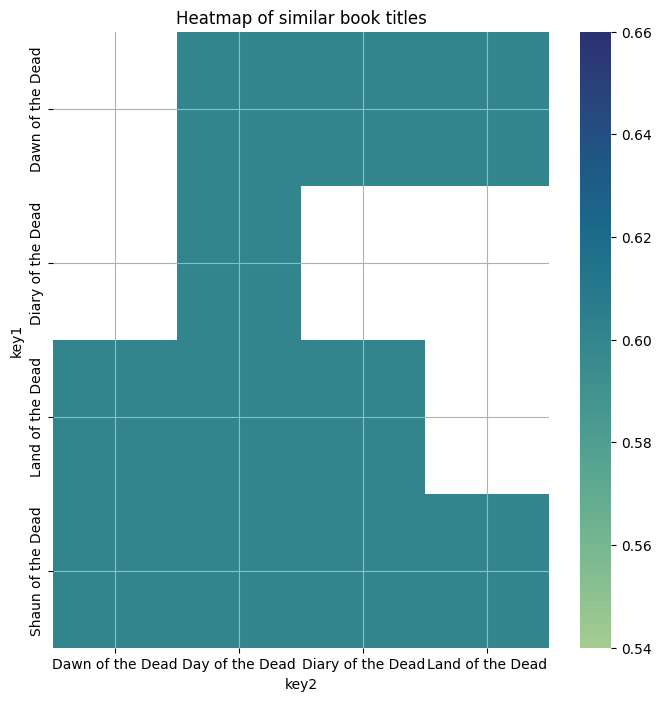

In [33]:
# plot book titles instead of keys
found_similar_items_with_lsh_new = {(titles[key1], titles[key2]): value for (key1, key2), value in found_similar_items_with_lsh_new.items()}
plot_heatmap(found_similar_items_with_lsh_new,plot_title='Heatmap of similar book titles')

In [39]:
word_tokenize("JAson")

['JAson']

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jason\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## Heatmap based on descriptions <a id="heatmap-based-on-desc"></a> <br>


In [42]:
def clean_text(text):
    tokens = word_tokenize(text)
    clean_tokens = []
    
    for token in tokens:
        # Convert to lowercase
        token = token.lower()
        
        # Remove punctuation
        if token not in string.punctuation:
            # Remove stopwords
            if token not in stopwords.words('english'):
                clean_tokens.append(token)
    
    return clean_tokens

# Transform output into a single string
def clean_text_string(text):
    tokens = word_tokenize(text)
    clean_tokens = []
    
    for token in tokens:
        # Convert to lowercase
        token = token.lower()
        
        # Remove punctuation
        if token not in string.punctuation:
            # Remove stopwords
            if token not in stopwords.words('english'):
                clean_tokens.append(token)

    return ' '.join(clean_tokens)

# Example usage
test = 'This is a test sentence. It contains punctuation!'
print(clean_text_string(test))


test sentence contains punctuation


In [ ]:
Movies_desc = pd.read_csv('data/movie_titles_and_ids.csv')
len(Movies_desc)

125

In [62]:
# Take the 200 books with highest n_ratings in a new dataframe
Movies_desc_ = Movies_desc.sort_values('Rating', ascending=False)
# Reset index
Movies_desc_ = Movies_desc_.reset_index(drop=True)
# Movies_desc_ = Movies_desc_[0:50].reset_index(drop=True)
len(Movies_desc_)

125

In [63]:
# Apply the clean_text_string function to the description column
Movies_desc_['Description_clean'] = Movies_desc_['Description'].apply(clean_text_string)

In [64]:
# run lsh on descriptions
b = 10
n = len(Movies_desc_)

descriptions = Movies_desc_['Description_clean'][0:n]
similar_descriptions = lsh(descriptions,jaccard_threshold=0.1,seed=42)
# Print the results
for (desc1, desc2), score in similar_descriptions.items():
    if score < 1:
        print(f"Similarity Score: {score}")
        print(f"Description 1: {descriptions[desc1]}")
        print(f"Description 2: {descriptions[desc2]}")
        print()

0
